# Homework


The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least **5 results** confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the `pandas` library.

In [1]:
!pip install basemap &>/dev/null && echo Done

Done


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.basemap as bm
import pandas as pd
import kagglehub

path = kagglehub.dataset_download("usdot/flight-delays")

airlines = pd.read_csv(f"{path}/airlines.csv")
airports = pd.read_csv(f"{path}/airports.csv")
flights = pd.read_csv(f"{path}/flights.csv", low_memory=False)
flights.head()


100%|██████████| 191M/191M [00:01<00:00, 123MB/s]

Extracting files...


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


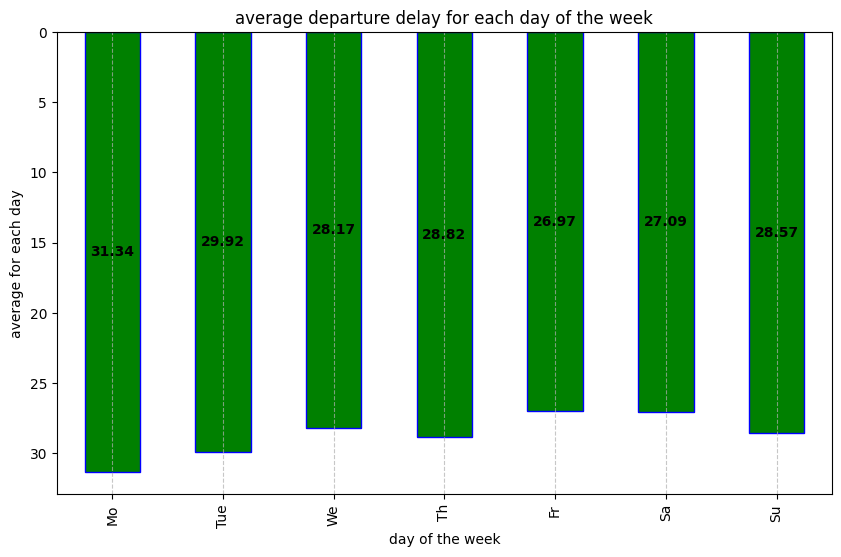

In [3]:
is_valid_origin = ~flights["ORIGIN_AIRPORT"].str.isdigit()
is_valid_destination = ~flights["DESTINATION_AIRPORT"].str.isdigit()
flights = flights[is_valid_origin & is_valid_destination]

#we will only look at flights which had a non-negative delay
newflights=flights[flights['DEPARTURE_DELAY'] >= 0]
dailyavg = newflights.groupby("DAY_OF_WEEK")["DEPARTURE_DELAY"].mean()
plt.figure(figsize=(10, 6))
ax = dailyavg.plot(kind="bar", color="green", edgecolor="blue")
ax.bar_label(ax.containers[0], fmt="%.2f", label_type="center", fontweight="bold")
ax.invert_yaxis()
plt.title("average departure delay for each day of the week")
plt.xlabel("day of the week")
plt.ylabel("average for each day")
plt.grid(axis="x", linestyle="--", alpha=0.7)
days_mapping = dict(zip(
  [1, 2, 3, 4, 5, 6, 7],
  "Mo Tue We Th Fr Sa Su".split()))
plt.xticks(
  ticks=range(len(dailyavg)),
  labels=[days_mapping[day] for day in dailyavg.index]
)
plt.show()

The received data shows that the most departure delays happen on **Mondays**, and the least delays happen on **Fridays**, with a broad difference of 4.37 minutes. This may be intepreted as a signal, that the airports are overloaded on **Mondays** and less crowded on **Fridays**. One way to solve this problem -- is to *distribute flights* in a more even way. Change regular **Monday** flights to **Friday** etc. Another way to help homogenize and minimize the delays -- is to *add more staff* on **Mondays**.

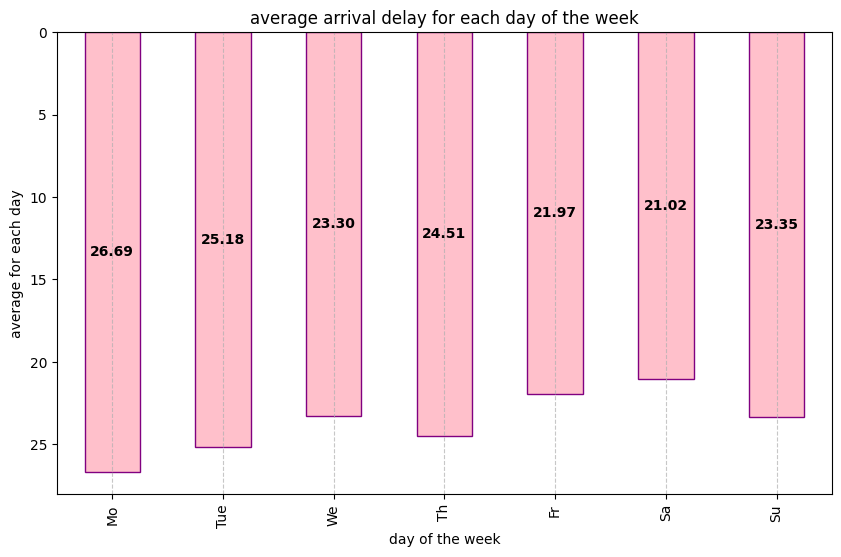

In [7]:

dailyavg = newflights.groupby("DAY_OF_WEEK")["ARRIVAL_DELAY"].mean()
plt.figure(figsize=(10, 6))
ax = dailyavg.plot(kind="bar", color="pink", edgecolor="purple")
ax.bar_label(ax.containers[0], fmt="%.2f", label_type="center", fontweight="bold")
ax.invert_yaxis()
plt.title("average arrival delay for each day of the week")
plt.xlabel("day of the week")
plt.ylabel("average for each day")
plt.grid(axis="x", linestyle="--", alpha=0.7)
days_mapping = dict(zip(
  [1, 2, 3, 4, 5, 6, 7],
  "Mo Tue We Th Fr Sa Su".split()))
plt.xticks(
  ticks=range(len(dailyavg)),
  labels=[days_mapping[day] for day in dailyavg.index]
)
plt.show()

What can be extracted from this data -- is that **Mondays** are the busiest for the arrivals also, which signals that the airport is way to crowded this day of the week. The average arrival delay on **Mondays** is greater than the average departure delay, which can be interpreted as a fault in time management for the arriving planes. The optimal solution here is to *expand the airport and hire additional personnel*.

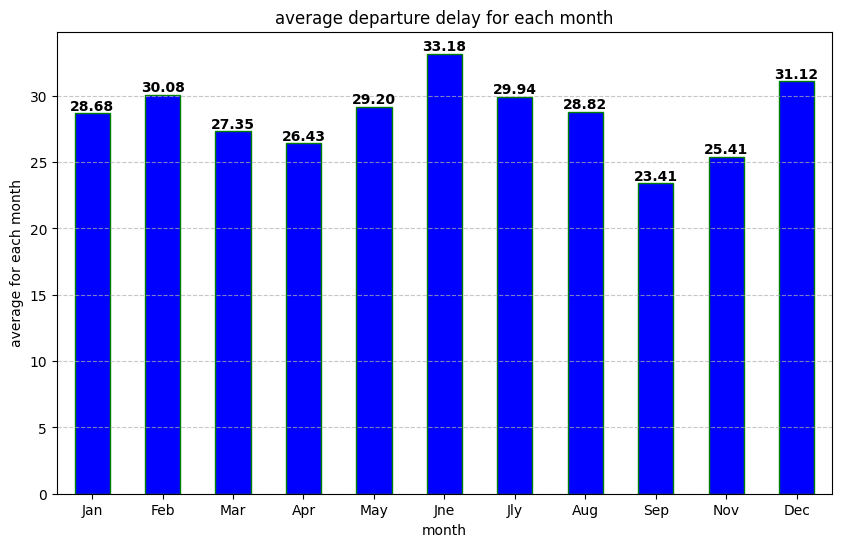

In [27]:

monthlyavg = newflights.groupby("MONTH")["DEPARTURE_DELAY"].mean()
plt.figure(figsize=(10, 6))
ax = monthlyavg.plot(kind="bar", color="blue", edgecolor="green")
ax.bar_label(ax.containers[0], fmt="%.2f", label_type="edge", fontweight="bold")
plt.title("average departure delay for each month")
plt.xlabel("month")
plt.ylabel("average for each month")
plt.grid(axis="y", linestyle="--", alpha=0.7)
months_mapping = dict(zip(
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  "Jan Feb Mar Apr May Jne Jly Aug Sep Oct Nov Dec".split()))
plt.xticks(
  ticks=range(len(monthlyavg)),
  labels=[months_mapping[month] for month in monthlyavg.index]
)
plt.xticks(rotation=0)
plt.show()

The presented data signals that most of the departure delays happen on **Junes** and **Decembers** with a small difference. The least delays happen in **Septembers**. This may mean that there are less or more flights during these months for different reasons. A solution to this kind of problem may be *allocating additional personnel and thinking about expanding the airport*.

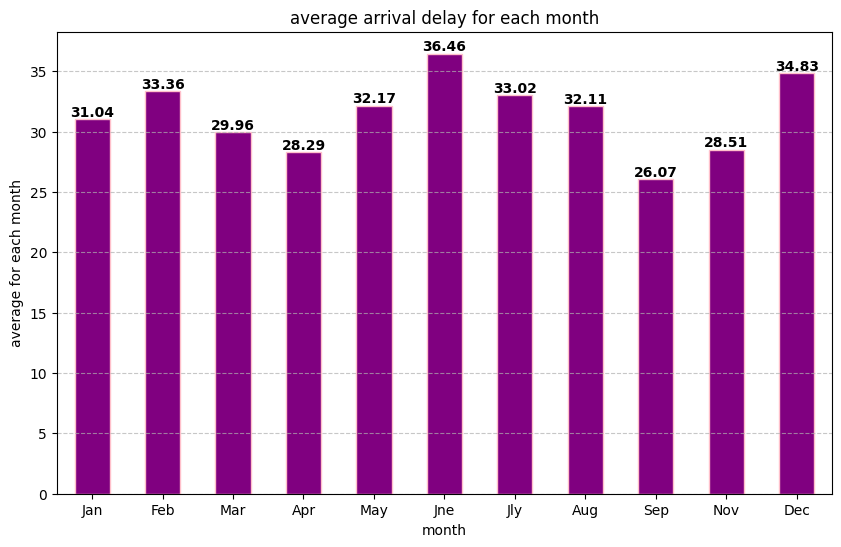

In [29]:
newflights=flights[flights['ARRIVAL_DELAY'] >= 0]
monthlyavg = newflights.groupby("MONTH")["ARRIVAL_DELAY"].mean()
plt.figure(figsize=(10, 6))
ax = monthlyavg.plot(kind="bar", color="purple", edgecolor="pink")
ax.bar_label(ax.containers[0], fmt="%.2f", label_type="edge", fontweight="bold")
plt.title("average arrival delay for each month")
plt.xlabel("month")
plt.ylabel("average for each month")
plt.grid(axis="y", linestyle="--", alpha=0.7)
months_mapping = dict(zip(
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  "Jan Feb Mar Apr May Jne Jly Aug Sep Oct Nov Dec".split()))
plt.xticks(
  ticks=range(len(monthlyavg)),
  labels=[months_mapping[month] for month in monthlyavg.index]
)
plt.xticks(rotation=0)
plt.show()

What can be extracted from this data -- is that **Junes** are the busiest for the arrivals also, which signals that the airport is too busy during this month. The average arrival delay in **Junes** is greater than the average departure delay, which can be interpreted as a fault in time management for the arriving planes. The optimal solution here is to *expand the airport and hire additional personnel*.

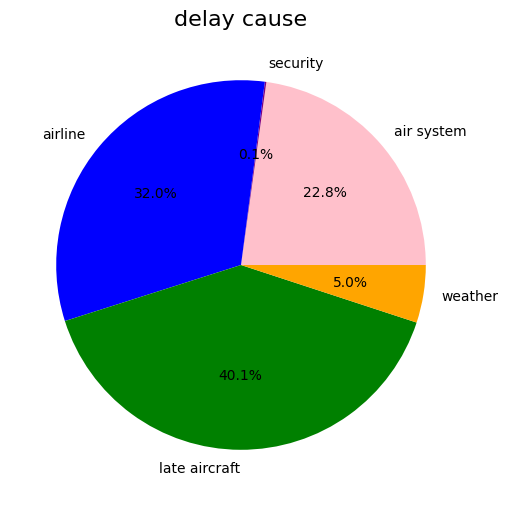

In [30]:
delaycauses = newflights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum()
labels = ['air system', 'security', 'airline', 'late aircraft', 'weather']
plt.figure(figsize=(10, 6))
plt.pie(delaycauses, labels=labels, autopct='%1.1f%%', startangle=0, colors=['pink', 'purple', 'blue', 'green', 'orange'])
plt.title('delay cause', fontsize=16)
plt.show()

As we can see on this pie chart here, the most popular reasons are: late aircraft and airline. This is to be expected as arrival delay implements departure delay.

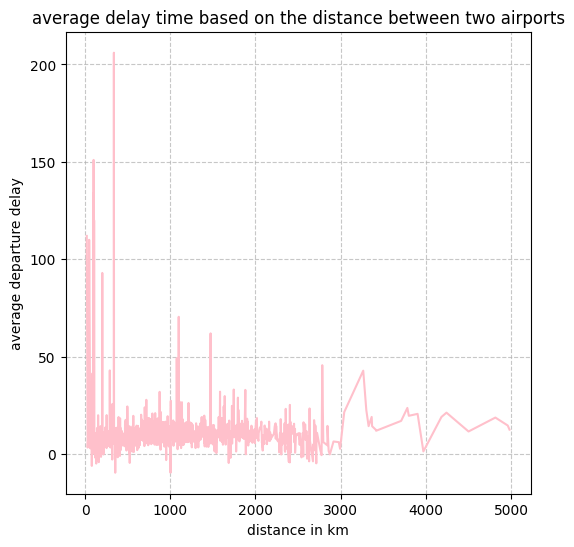

In [31]:
avg = flights.groupby("DISTANCE")["DEPARTURE_DELAY"].mean()

plt.figure(figsize=(6, 6))
plt.plot(avg.index, avg.values,  linestyle='-', color='pink')

plt.xlabel("distance in km")
plt.ylabel("average departure delay")
plt.title("average delay time based on the distance between two airports")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

This data signals that the most delays happen on close flights (less than 1000 km). This may occur for a simple reason, there are more close domestic flights.


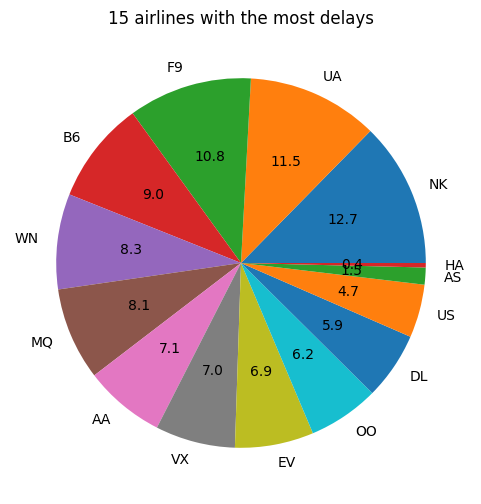

In [32]:
airlineavg = flights.groupby("AIRLINE")["DEPARTURE_DELAY"].mean()
airlineavg.sort_values(ascending=False, inplace=True) #modifies directly, from largest to smallest
airportavg = airlineavg[:15] #top 15 airlines from the sorted dataframe
plt.figure(figsize=(6, 6))
plt.pie(airlineavg.values, labels=airlineavg.index, autopct="%.1f")
plt.title("15 airlines with the most delays")
plt.show()